In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### Polynomial Regression

While we see what the relationship between these variables modeled as a straight line would be, but could a polynomial shape do better?  Let's first consider the simple polynomial case.  

In [6]:
mpg = pd.read_csv('data/mtcars.csv')

In [7]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


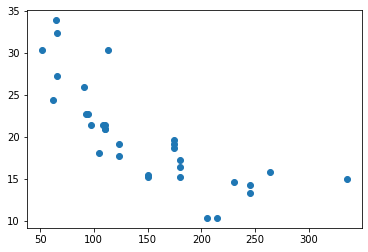

In [8]:
plt.figure()
plt.scatter(mpg['hp'], mpg['mpg'])

$$ f(m,b) = \sum (y_i - (mx + b))^2 $$

<center>
    vs.
    </center>
    
$$ f(a, b, c) = \sum (y_i - (ax^2 + bx + c))^2 $$

1. We need to create a new feature $x^2$ and fit a linear regression model to this -- please add an $x^2$ column to your data.

2. Build a linear regressor by passing both the original feature and squared feature as predictor variables.

3. Interpret the resulting coefficients.

4. Plot the results against the data.

5. Repeat for a **cubic** model.  

6. Fill in the table below:

| Degree Polynomial | RMSE |
| ------------      | ------ |
| 1     |     |
| 2     |     | 
| 3     |     |


7. What is happening and what do you think would come of the RMSE if you increase degree to 10?  Are there any issues with this?

### Doing it with `sklearn`

In [14]:
#Polynomial Features and Transformations


In [15]:
#Instantiate

In [16]:
#Fit

In [17]:
#Predict

In [18]:
#plot

**Determining Shape**


One way to look at whether there is a quadratic relationship between variables is to examine the graph of the residuals.  Below, we construct residual plots for the linear and quadratic case that include a fitted line.  Note the lack of pattern in the quadratic fit.

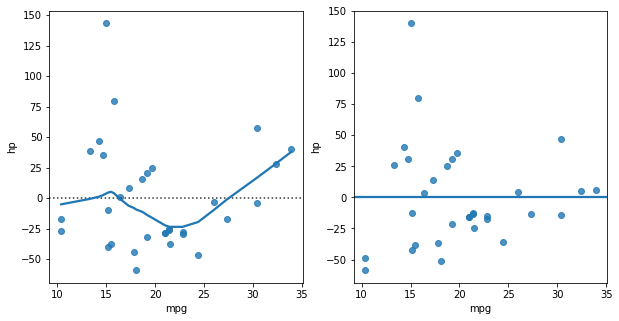

In [45]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.residplot(mpg['mpg'], mpg['hp'], lowess = True)

plt.subplot(1, 2, 2)
sns.residplot(mpg['mpg'], mpg['hp'], order = 2, lowess = True)

### What's the right complexity?

![](images/bvtrade.png)

### Experiment in `NumPy`

- Create five random subsets of your data
- Fit linear regression models for degree 1 - 10 to each of the subsets and determine RMSE.  Create a plot of these values along the lines demonstrated below.

Text(0, 0.5, 'RMSE')

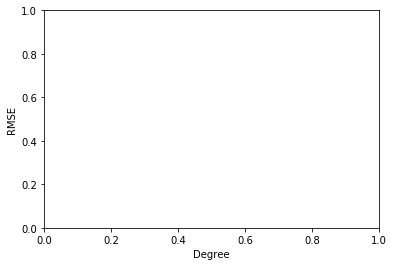

In [19]:
plt.figure()
plt.xlabel('Degree')
plt.ylabel('RMSE')

In [25]:
#get coefficient and intercept
line = np.polyfit(mpg['mpg'], mpg['hp'], 1)
#create a polynomial based on coefs and int
poly = np.polyval(line, mpg['mpg'])

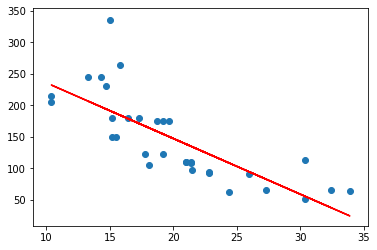

In [24]:
plt.plot(mpg['mpg'], poly, color = 'red')
plt.scatter(mpg['mpg'], mpg['hp'])

In [26]:
#loop over range of values for complexity

#create five models on random subsets of data

#evaluate RMSE for each model 

#keep track in meaningful way!

#plot results


## Grid Searching Degree

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [47]:
from sklearn.datasets import load_boston, california_housing

In [55]:
boston = load_boston()

In [56]:
#boston = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
X_train, X_test,  y_train, y_test = train_test_split(boston.data[:, :2],  boston.target, random_state = 24)

In [ ]:
pipe = Pipeline([('poly_feat', PolynomialFeatures()), ('lm', LinearRegression())])
param_grid = {'poly_feat__degree': [i for i in range(1, 10)]}

In [ ]:
grid = GridSearchCV(pipe, param_grid=param_grid)

In [ ]:
grid.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [74]:
pipe2 = Pipeline([('poly_feat', PolynomialFeatures()), ('ridge', Ridge())])
param_grid2 = {'poly_feat__degree': [i for i in range(1, 10)], 'ridge__alpha': [0.1, 1.0, 5.0, 100.0, 1000.0]}

In [75]:
grid2 = GridSearchCV(pipe2, param_grid=param_grid2, cv = 5)

In [78]:
grid2.fit(boston.data, boston.target)

/Users/NYCMath/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/NYCMath/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/NYCMath/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/NYCMath/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/NYCMath/a

KeyboardInterrupt: 

In [67]:
grid2.best_estimator_

Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [52]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv = 5)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(mpg[['mpg']], mpg['hp'])

In [54]:
grid.fit(X_train, y_train)

/Users/NYCMath/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'poly_feat__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [59]:
best = grid.best_estimator_

In [60]:
type(best)

sklearn.pipeline.Pipeline

In [57]:
best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [58]:
best.named_steps['lm'].coef_

array([ 0.00000000e+00,  2.62365746e+02, -1.95274049e+01,  5.83755280e-01,
       -6.16134271e-03])